In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [16]:
x, y = make_moons(n_samples=1000, noise=0.2)

In [17]:
df = {'x1': x[:, 0], 'x2': x[:, 1], 'y': y}

In [18]:
data = pd.DataFrame(df)

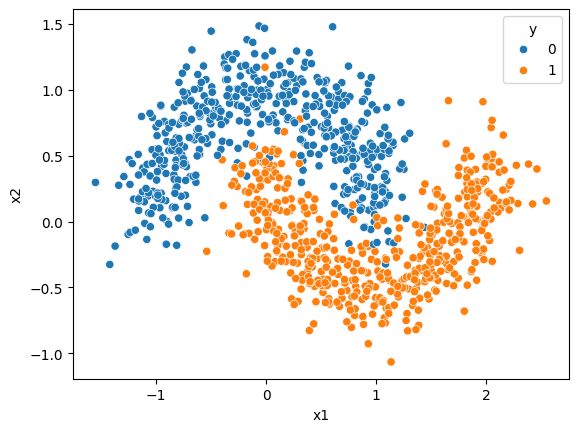

In [19]:
sns.scatterplot(x='x1', y='x2', data=data, hue='y')
plt.show()

In [20]:
x_a = data.iloc[:, :-1]
y_a = data['y']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size=0.2, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [25]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100

(95.5, 100.0)

In [26]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_test, y_test)*100, svc.score(x_train, y_train)*100

(97.0, 96.625)

In [27]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test, y_test)*100, gnb.score(x_train, y_train)*100

(89.5, 86.875)

In [28]:
from sklearn.ensemble import VotingClassifier

In [29]:
li = [('dt1', DecisionTreeClassifier()), ('svc1', SVC()), ('gnb1', GaussianNB())]

In [31]:
vc = VotingClassifier(estimators=li)
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('svc1', SVC()),
                             ('gnb1', GaussianNB())])

In [32]:
vc.score(x_test, y_test)*100, vc.score(x_train, y_train)*100

(97.0, 97.875)

In [33]:
pred = {'dt': dt.predict(x_test), 'svc': svc.predict(x_test), 'gnb': gnb.predict(x_test), 'vc': vc.predict(x_test)}

In [34]:
pd.DataFrame(pred)

,dt,svc,gnb,vc
0,0,0,0,0
1,1,1,1,1
2,1,1,1,1
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
195,1,1,1,1
196,1,1,1,1
197,1,1,1,1
198,1,1,1,1
